In [71]:
!pip install streamlit -q
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!pip show streamlit

Name: streamlit
Version: 1.17.0
Summary: The fastest way to build data apps in Python
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, importlib-metadata, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, pympler, python-dateutil, requests, rich, semver, toml, tornado, typing-extensions, tzlocal, validators, watchdog
Required-by: 


In [72]:
from pyngrok import ngrok

ngrok.set_auth_token('2L27YaPkGahXsWcWcWL8mFOl6m9_5iLnUXVu7izCia8L2zxYL')

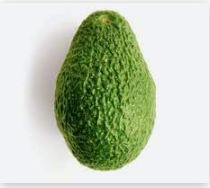

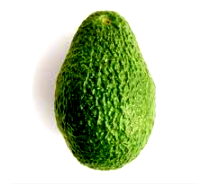

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

src = cv2.imread("/content/drive/MyDrive/dataset/bright green avocado/bright green avocado136.jpg")

alpha1 = -0.5 # 명암 조정값
alpha2 = 0.5 # 명암 조정값

dst1 = np.clip((1+alpha1) * src - 128 * alpha1, 0, 255).astype(np.uint8)

dst2 = np.clip((1+alpha2) * src - 128 * alpha2, 0, 255).astype(np.uint8)

cv2_imshow(src)
#cv2_imshow(dst1)
cv2_imshow(dst2)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [73]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import pandas as pd
import numpy as np
from keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

model = load_model('/content/drive/MyDrive/dataset/avocado_2.h5')
IMAGE_SIZE = (224, 224)
alpha = 1.0 # 명암 조정값
st.title(':green[아보카도] 분류 인공지능 웹페이지')
st.caption('[멀티캠퍼스] 서비스 산업 데이터를 활용한 빅데이터분석 8회차 유성운')

tab1, tab2, tab3 = st.tabs(["Avocado", "Why ripe?", "How to make"])

hide_streamlit_style = """
            <style>
            #MainMenu {visibility: hidden; }
            footer {visibility: hidden;}
            </style>
            """
st.markdown(hide_streamlit_style, unsafe_allow_html=True)

with tab1:
  st.header('익었는지 확인하고 싶은 :green[아보카도]의 사진을 올려주세요')
  file = st.file_uploader('아보카도의 사진을 올려주세요', label_visibility="hidden")

  if file is None:
    st.subheader(':green[아보카도]가 익었는지 확인할게요')
  else:
    img = Image.open(file)
    img_resized = img.convert('RGB')
    img_resized = ImageOps.fit(img_resized, (224,224), Image.ANTIALIAS)
    img_resized2 = ImageOps.fit(img_resized, (224,224), Image.ANTIALIAS)
    st.image(img_resized2, use_column_width='auto')
    img_resized = image.img_to_array(img_resized)
    img_resized = np.clip((1+alpha) * img_resized - 128 * alpha, 0, 255).astype(np.uint8) ##명암조절기능
    img_resized = img_resized.reshape((1, 224, 224, 3))
    img_resized = preprocess_input(img_resized)

    prediction = model.predict(img_resized)
    answer = ""
    if prediction[0] >= 0.5: # 중앙값을 기준으로 아보카도 분류
      answer = "다 익었습니다!"
    else:
      answer = "덜익었습니다!"
    st.success(answer)

with tab2:
   ###아보카도정보
  st.header(":green[아보카도]는 왜 익혀 먹어야 할까?")
  st.info("""
  - 익히지 않았을때: 딱딱하여 조리가 어렵고 맛이 씁니다.
  - 다 익었을때: 부드러워지면 조리가 쉬워지고 당도가 올라가 좋은 맛을 냅니다.
  """)
  st.image('/content/drive/MyDrive/dataset/avocado ripe.jpg', use_column_width=True)
  st.subheader(':green[아보카도]를 활용한 다양한 요리')
  st.image('/content/drive/MyDrive/dataset/과카몰리.jpg', use_column_width=True)
  st.info("""
  과카몰리
  - 1. 토마토와 양파는 잘게 썰어 줍니다.
  - 2. 으깨어 놓은 아보카도에 토마토, 양파, 레몬즙 1큰술, 소금과 설탕은 한꼬집씩, 후추는 약간 뿌려 버무려 줍니다.
  - 3. 식빵이나 바게트빵, 또는 나초와 함께 곁들여 먹으면 더 좋습니다.
  """)
  st.image('/content/drive/MyDrive/dataset/아보카도덮밥.jpg', use_column_width=True)
  st.info("""
  아보카도 훈제연어 덮밥
  - 1. 팬에 채 썬 양파 1/4개와 진간장 2 큰 술, 설탕 1/2 큰 술, 미림 2 큰 술, 물 3 큰 술을 넣고 약불에서 소스가 자작해질 때까지 졸여주세요.
  - 2. 껍질 제거한 아보카도를 얇게 슬라이스 후 소금을 약간 뿌려 밑간을 합니다.
  - 3. 해동한 훈제연어(80g)를 먹기 좋은 크기로 잘라줍니다. 소금 약간 후추 약간 뿌려서 계란 반숙도 해줍니다.
  - 4. 그릇에 밥 먼저 담고 그 위에 양파 조림 소스를 넓게 깔아주고 아보카도와 훈제연어를 올려주세요
  - 5. 마지막으로 계란 반숙을 올리고 송송 썬 쪽파로 마무리합니다.
  """)
  st.image('/content/drive/MyDrive/dataset/아보카도샌드위치.jpg', use_column_width=True)
  st.info("""
  아보카도 샌드위치
  - 1. 호밀식빵은 달궈진 마른 팬에 살짝 구워 바삭함과 고소함을 더해줍니다.
  - 2. 아보카도는 슬라이스 해서 넣어줄 수도 있지만 으깨어 소금과 후추로 간을 해주면 따로 소스를 준비하지 않아도 됩니다.
  - 3. 바삭한 식빵위에 위에 준비해준 아보카도소스를 충분히 발라준후 약간 쓴맛이 나는 적치커리, 방울토마토, 베이컨, 새싹채소를 듬뿍 넣어주세요.
  - 4. 먹기좋게 잘라 접시에 담아주세요.
  """)

with tab3:
  st.header(':green[아보카도] 인공지능 작동 순서')

  ###아보카도 인공지능 설명
  st.info("""
  - 업로드 된 :green[아보카도]의 이미지를 인공지능에 입력합니다.
  - 받은 이미지를 변환합니다.
  - 준비된 학습 모델로 이미지를 분류합니다.
  - 결과를 출력합니다.
  """)
  st.image('/content/drive/MyDrive/dataset/아보카도 작동순서.PNG', use_column_width=True)

  st.header(':green[아보카도] 인공지능 개발 과정')
  st.subheader('1. 이미지 크롤링')

  st.info("""
  - 학습을 위한 대량의 아보카도의 이미지가 필요
  - Google image를 통해 아보카도를 두분류로 나누어 크롤링 
  """)
  
  code = '''from selenium import webdriver
  from selenium.webdriver.chrome.service import Service
  from webdriver_manager.chrome import ChromeDriverManager
  from selenium.webdriver.common.by import By  
  from selenium.webdriver.common.keys import Keys
  import pandas as pd
  import numpy as np
  import time
  import requests

  chrome_options = webdriver.ChromeOptions()
  driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

  #구글 이미지 접속
  driver.get('https://images.google.com/')
  # time.sleep(2)

  ##검색어 입력 및 조회  
  search_name = input("검색하고 싶은 키워드 : ")     
  img_cnt = int(input("원하는 이미지 수집 개수 : ")) 

  # 입력 박스 선택
  input_box = driver.find_element(By.CSS_SELECTOR, 'input.gLFyf.gsfi')
  input_box.clear()
  input_box.send_keys(search_name)   
  input_box.send_keys(Keys.ENTER)
  driver.implicitly_wait(10)

  img_box = driver.find_element(By.CSS_SELECTOR, 'div.islrc')
  images = img_box.find_elements(By.CSS_SELECTOR, 'img')

  ###스크롤 다운
  old_h = driver.execute_script('return window.scrollY')
  while True:
      images = img_box.find_elements(By.CSS_SELECTOR, 'img.rg_i.Q4LuWd')
    
      print("확보된 이미지 : ", len(images))
      if len(images) > img_cnt:
          break

      driver.find_element(By.CSS_SELECTOR, 'body').send_keys(Keys.END)
      time.sleep(1)
      new_h = driver.execute_script('return window.scrollY')
      time.sleep(1)
      print(new_h)
  
      if new_h == old_h:
          if len(images) < img_cnt:  # 결과 더보기 클릭!
              driver.find_element(By.CSS_SELECTOR, 'input.mye4qd').click()  
              time.sleep(2)
              continue
          break

      old_h = new_h

  driver.find_element(By.CSS_SELECTOR, 'body').send_keys(Keys.HOME)

  image_save_folder = ''
  skip_cnt = 10
  for i in range( img_cnt+1 ) :
      image = img_box.find_elements(By.TAG_NAME,"img")[i]
      file_name = image_save_folder + search_name + str(i+1) + ".jpg"
      im age.screenshot(file_name)
      print(file_name)
      try:
          image.screenshot(file_name)
      except:
          continue'''

  st.info("총 2000장의 아보카도 이미지를 크롤링하였다.")
  st.image('/content/drive/MyDrive/dataset/dataset_img.PNG', use_column_width=True)
  if st.button('Show Code'):
    st.code(code, language='python')

##### 이미지분석
  st.subheader('2. 이미지 분석')
  st.info("아보카도를 분류하기 위해 분석해보았다.")
  st.info("""
  - RGB값을 확인하여 덜익은 아보카도와 익은 아보카도를 확인하였다.
  - :green[초록]부분이 많은 덜익은 아보카도는 :green[G값(green)]이 밝게 나왔다.
  - :red[붉은]부분이 많은 익은 아보카도는 :red[R값(red)]이 밝게 나왔다.
  """)

  code2 = '''img_rgb = plt.imread(file)
  plt.figure(figsize=(10, 2))

  plt.subplot(141)
  plt.imshow(img_rgb[50:200, 50:200, :])
  plt.axis("off")
  plt.title("RGB")

  plt.subplot(142)
  plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("R")

  plt.subplot(143)
  plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("G")

  plt.subplot(144)
  plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
  plt.axis("off")
  plt.title("B")

  plt.show()'''

  st.image('/content/drive/MyDrive/dataset/RGB초록아보카도.png', use_column_width=True)
  st.image('/content/drive/MyDrive/dataset/RGB빨강아보카도.png', use_column_width=True)
  
  if st.button('Show RGB Code'):
    st.code(code2, language='python')

  st.info("""
  - 경계선값을 확인하여 윤곽을 확인해 보았다.
  """)
  st.image('/content/drive/MyDrive/dataset/윤곽선.png', use_column_width=True)

  code3 = '''
  img = plt.imread(file)

  edges = cv2.Canny(img, 50, 100)

  plt.subplot(141)
  plt.imshow(img, cmap="gray")
  plt.title("img")
  plt.axis('off')
  plt.subplot(142)
  plt.imshow(edges, cmap="Greys", alpha=0.3)
  plt.axis('off')
  plt.title("Canny Detection")
  plt.tight_layout()
  plt.show()
  '''

  if st.button('Show Canny Code'):
    st.code(code3, language='python')

  st.info("""
  - RGB값을 활용하여 히스토그램을 출력하였다.
  - 히스토그램의 그래프를 확인해보면 덜익은 아보카도와 익은 아보카도의 이미지 색상차이를 수치로 확인할 수 있다.
  """)
  st.image('/content/drive/MyDrive/dataset/덜익은아보카도 히스토그램.png', use_column_width=True)
  st.image('/content/drive/MyDrive/dataset/다익은 아보카도 히스토그램.png', use_column_width=True)

  code4 = '''
  for i in range(10, 15):
    img2= plt.imread(file)
    hist = cv2.calcHist([img2], [0], None, [256], [0, 256])

    plt.subplot(121)
    plt.imshow(img2, "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.plot(hist, color='r')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()
  '''

  if st.button('Show Histogram Code'):
    st.code(code4, language='python')

  st.subheader('3. 학습모델 제작')
  st.info("Transfer learning monel인 DenseNet121을 튜닝하여 모델을 제작하였다.")
  st.info("""
  - Transfer learning monel의 데이터셋으로는 ImageNet데이터를 사용하였다.
  - 크롤링한 데이터를 전처리한 아보카도를 이미지데이터셋을 학습시켰다.
  - 적용한 하이퍼 파라미터는 다음과 같다.
  - optimizer=Adam(learning_rate=0.0001) , batch_size = 16, epochs=20
  """)

  st.info("학습결과는 다음의 차트와 같다.")
  st.image('/content/drive/MyDrive/dataset/Dens그래프.png', use_column_width=True)
  
  code5 = '''
  models = {
      "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0}
      }
  # Create the generators
  train_generator,test_generator,train_images,val_images,test_images=create_gen()
  print('\n')

  def get_model(model):
  # Load the pretained model
      kwargs =    {'input_shape':(224, 224, 3),
                  'include_top':False,
                  'weights':'imagenet',
                  'pooling':'avg'}
      
      pretrained_model = model(**kwargs)
      pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
      
      inputs = pretrained_model.input

      x = tf.keras.layers.Dense(512, activation='relu')(pretrained_model.output) ## 512의 유닛을 가진 2층의 신경망 추가
      x = tf.keras.layers.Dense(512, activation='relu')(x)

      outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x) ##이진분류
      model = tf.keras.Model(inputs=inputs, outputs=outputs)


      model.compile(
          optimizer=optimizers.Adam(learning_rate=0.0001),
          loss='binary_crossentropy',
          metrics=['accuracy']
      )
      
      return model

  # Train모델 학습
  for name, model in models.items():
      
      # 전이 학습 모델 가져오기
      m = get_model(model['model'])
      models[name]['model'] = m
      
      start = perf_counter()
      
      # 모델 학습
      Dens_history =  m.fit(train_images,
                      batch_size = 16, 
                      epochs=50,
                      verbose = 1,
                      validation_data=val_images)
      
      # 학습시간과 val_accuracy 저장
      duration = perf_counter() - start
      duration = round(duration,2)
      models[name]['perf'] = duration
      print(f"{name:20} trained in {duration} sec")
      
      val_acc =  Dens_history.history['val_accuracy']
      models[name]['val_acc'] = [round(v,4) for v in val_acc]

  ###모델 저장
  from keras.models import load_model
  m.save('/content/drive/MyDrive/dataset/avocado_2.h5')
  '''

  if st.button('Show Model Code'):
    st.code(code5, language='python')

  st.subheader('4. 학습모델의 성능 테스트')
  st.info("""
  - precision, recall, f1-score 의 값은 아래표와 같다.
  - 각각 높은 수치로 좋은 분류성능을 보였다고 할 수 있다.
  """)
  df=pd.read_csv('/content/drive/MyDrive/dataset/result2.csv')
  st.table(df)

  code6 = '''
  from sklearn.metrics import classification_report

  y_test = list(test_df.Label)

  for i in range(len(y_test)):
    if y_test[i] == 'bright green avocado':
      y_test[i]= 1
    else:
      y_test[i]= 2

  preds_1d = prediction.flatten() # 차원 펴주기
  pred_class = np.where(preds_1d > 0.5, 2 , 1) #0.5보다크면 2, 작으면 1

  class_report = classification_report(y_test, pred_class)
  print(class_report)
  '''

  if st.button('Show Score Code'):
    st.code(code6, language='python')

  st.info("""
  - 이미지를 분류해내는 성능을 테스트해보았다.
  - 126개의 테스트 이미지중에서 한장을 골라 성능을 테스트해보았다.
  - 결과적으로 100%에 가까운 이미지분류 정확도를 보였다.
  """)
  st.image('/content/drive/MyDrive/dataset/예측률 2.PNG', use_column_width=True)

  st.info("""
  - 126개의 테스트 이미지중에서 랜덤으로 24장을 골라 성능을 테스트해보았다.
  - 해당 이미지의 카테고리와 학습모델의 예측결과가 일치할 경우 :blue[True] 틀릴경우 :red[False]를 출력하게 하였다.
  - 24개의 이미지 모두 :blue[True]를 출력하며, 높은 성능의 분류정확도를 보였다. 
  """)
  st.image('/content/drive/MyDrive/dataset/24장이미지.png', use_column_width=True)

  st.subheader('5. 더 높은 분류 정확도를 위한 방법')
  st.info("""
  - 이미지가 어두울 경우 덜익은 아보카도일지라도 익었다고 판단하는 경우가 있다.
  - 이러한 문제를 해결하기 위해 이미지를 입력받을 때, 이미지의 명암비를 조절하였다.
  - 추가로 안티엘리어싱을 적용하여 태두리를 더 확실하게 하여 이미지를 분류하기 쉽게 만들었다.
  """)
  st.image('/content/drive/MyDrive/dataset/명암조절.PNG', use_column_width=True)

  code7 = '''
  import cv2
  import numpy as np
  from google.colab.patches import cv2_imshow

  src = cv2.imread("file")

  alpha1 = -0.5 # 명암 조정값
  alpha2 = 1.0 # 명암 조정값

  dst1 = np.clip((1+alpha1) * src - 128 * alpha1, 0, 255).astype(np.uint8)

  dst2 = np.clip((1+alpha2) * dst1 - 128 * alpha2, 0, 255).astype(np.uint8)
  '''

  if st.button('Show Shade Code'):
    st.code(code7, language='python')

Overwriting app.py


In [74]:
ngrok.kill()

In [75]:
!nohup streamlit run app.py --server.port 80 &

nohup: appending output to 'nohup.out'


In [76]:
url = ngrok.connect(port='80')
url

<NgrokTunnel: "http://3246-34-125-216-219.ngrok.io" -> "http://localhost:80">

In [ ]:
!ls

In [ ]:
!cat app.py

In [ ]:
!ps

In [ ]:
!kill 3588

In [ ]:
import pandas as pd
import numpy as np

data={
    'test':['덜익은 아보카도', '익은 아보카도','accuracy','macro avg','weighted avg'],
    'precision':[0.99,0.98,np.nan,0.98,0.98],
    'recall':[0.99,0.98,np.nan,0.98,0.98],
    'f1-score':[0.99,0.98,0.98,0.98,0.98],
    'support':[69,57,126,126,126]
}
index=['덜익은 아보카도', '익은 아보카도','accuracy','macro avg','weighted avg']

df = pd.DataFrame(data, index = None)
##df.to_csv('/content/drive/MyDrive/dataset/result2.csv', index=False) #csv파일로 생성
df_reset=df.set_index('test')
df_r = df.reset_index()
df_reset.to_csv('/content/drive/MyDrive/dataset/result2.csv') #csv파일로 생성